## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

作業1：調整參數

In [17]:
from sklearn import datasets, metrics

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [18]:
iris = datasets.load_iris()

x_train,x_test,y_train,y_test = train_test_split(iris.data, iris.target, test_size=0.25,random_state=4)

clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [19]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ",acc)

Accuracy:  0.9736842105263158


In [20]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [21]:
print("Feature importance: ",clf.feature_importances_)

Feature importance:  [0.01796599 0.         0.05992368 0.92211033]


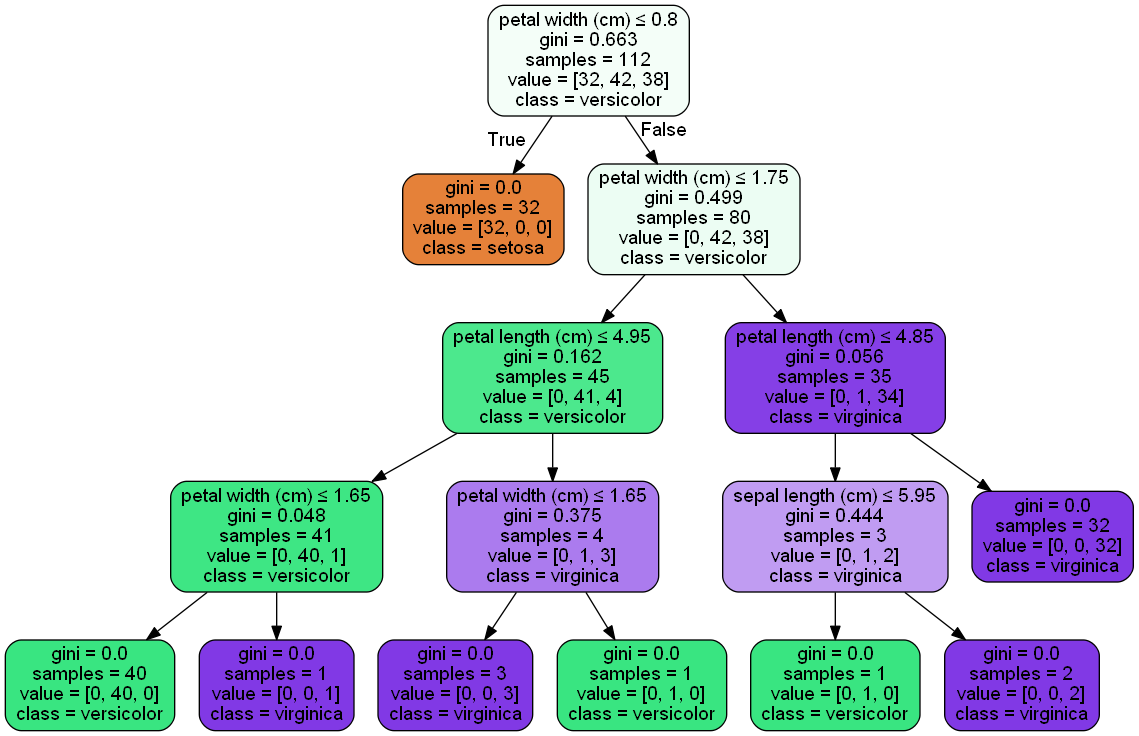

In [22]:
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### 調整參數
* 影響最大的是max_depth()樹的生長限制，若降至只有1，準確率就只剩6成

In [23]:
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth =1,
    min_samples_split=2,
    min_samples_leaf=1
)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [24]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ",acc)

Accuracy:  0.6842105263157895


In [25]:
print("Feature importance: ",clf.feature_importances_)

Feature importance:  [0. 0. 1. 0.]


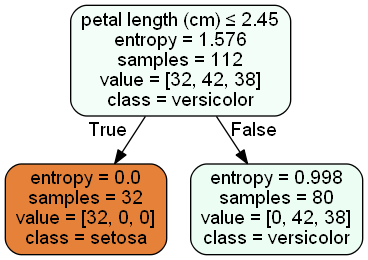

In [26]:
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### 作業2：改用boston，並與回歸模型比較
* 多跑幾次後發現決策數有時mse比回歸小，有時比較大，但回歸出來的mse差異不大

In [27]:
boston = datasets.load_boston()
x_train,x_test,y_train,y_test = train_test_split(boston.data, boston.target,test_size=0.25,random_state=4)

In [28]:
clf = DecisionTreeRegressor(
    criterion="mse",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [29]:
mse = metrics.mean_squared_error(y_test, y_pred)
print("MSE: ",mse)

MSE:  27.30236220472441


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred_by_reg = reg.predict(x_test)

In [32]:
mse_reg = metrics.mean_squared_error(y_test, y_pred_by_reg)
print("MSE: ", mse_reg)

MSE:  26.95142562423585
